<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/09.%20%D0%9A%D0%B0%D0%BA%20%D0%BB%D0%B5%D0%B3%D0%BA%D0%BE%20%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%B0%D1%82%D1%8B%D0%B2%D0%B0%D1%82%D1%8C%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%3F.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://t.me/init_python"><img src="https://dfedorov.spb.ru/pandas/logo-telegram.png" width="35" height="35" alt="telegram" align="left"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Для этого урока используется набор данных `air_quality_no2_long.csv`.

In [2]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [3]:
air_quality = pd.read_csv(url)

In [4]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [5]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [6]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

### Использование свойств даты и времени 

Я хочу работать с датами в столбце `datetime` как объектами даты и времени вместо простого текста:

In [7]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [8]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Первоначально значения в `datetime` являются символьными строками и не предоставляют никаких операций даты и времени (например, извлечение года, дня недели и т.д.). Применяя функцию [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), pandas интерпретирует строки и преобразует их в объекты `datetime` (т.е. `datetime64[ns, UTC]`). В `pandas` мы называем эти объекты аналогично стандартной библиотеке [`datetime.datetime pandas.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp).

Поскольку многие наборы данных содержат информацию в формате `datetime` в одном из столбцов, функции [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) и [`pandas.read_json()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html#pandas.read_json) могут выполнить преобразование к датам в момент чтения данных через использование параметра `parse_dates`:

```Python
pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])
```

Какая польза от объектов [`pandas.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp)?

С какой даты начинается и оканчивается набор данных?

In [9]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Использование [`pandas.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp) для `datetime` позволяет нам производить расчеты с информацией о дате. Следовательно, мы можем использовать этот тип данных, чтобы получить длину временного ряда:

In [10]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

В результате получается объект [`pandas.Timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp), аналогичный `datetime.timedelta` в стандартной библиотеке Python и определяющий продолжительность времени.

Различные концепции времени, поддерживаемые `pandas`, объясняются в разделе [руководства пользователя о концепциях, связанных со временем](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-overview).

Я хочу добавить новый столбец, содержащий только месяц измерения:

In [11]:
air_quality["month"] = air_quality["datetime"].dt.month

In [12]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


Используя объекты `Timestamp`, появляются многие связанные со временем свойства. Например `month`, `year`, `weekofyear`, `quarter`... Все эти свойства доступны по [аксессору `dt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html).

Обзор существующих свойств даты приведен в [таблице](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-components). 

Какая средняя концентрация $NO_2$ для каждого дня недели и для каждого места измерения?

In [ ]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

Здесь мы хотим вычислить статистику для каждого дня недели и для каждого места измерения. Для группировки по рабочим дням мы используем свойство `weekday` (с `Monday=0` и `Sunday=6`) для `Timestamp`, которое также доступно через `dt`. Группировка по местоположениям и по дням недели выполняется, чтобы разделить вычисление среднего значения для каждой из этих комбинаций.

Типичный график для $NO_2$ в течение дня для всех станций. Другими словами, каково среднее значение для каждого часа дня?

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("Hour of the day");  # произвольная метка для оси x
plt.ylabel("$NO_2 (µg/m^3)$");

Как и в предыдущем случае, мы хотим вычислить данную статистику (например, среднее $NO_2$) для каждого часа дня, мы снова можем использовать [groupby метод разделения-применения-объединения](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). 

### Datetime как индекс 

В блокноте [Как изменить раскладку таблиц](http://dfedorov.spb.ru/pandas/) [`pivot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html#pandas.pivot) использовался, чтобы изменить таблицу данных с каждым из мест измерения в качестве отдельной колонки:

In [13]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

In [14]:
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


Поворачивая данные, информация о дате и времени стала индексом таблицы. Установка столбца в качестве индекса может быть достигнута функцией [`set_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html).

Работа с индексом `datetime` (т.е. `DatetimeIndex`) обеспечивает мощные возможности. Например, нам не нужен метод `dt` для получения свойств временного ряда, но эти свойства доступны непосредственно в индексе:

In [ ]:
no_2.index.year, no_2.index.weekday

Существуют другие преимущества: удобное подмножество периода времени или адаптированный масштаб времени на графиках. Давайте применим это к нашим данным.

Построим график показаний $NO_2$ на разных станциях с 20 мая до конца 21 мая:

In [ ]:
no_2["2019-05-20":"2019-05-21"].plot();

Предоставляя строку, которая анализирует дату и время, можно выбрать конкретное подмножество данных в `DatetimeIndex`.

Более подробная информация о `DatetimeIndex` приведена в [разделе, посвященном индексированию временных рядов](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-datetimeindex).

### Измените временной ряд на другую частоту

Объедините текущие значения часовых временных рядов с максимальным месячным значением на каждой из станций с помощью метода [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).

In [19]:
monthly_max = no_2.resample("D").max()

In [20]:
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 00:00:00+00:00,50.5,77.7,32.0
2019-05-08 00:00:00+00:00,23.0,48.9,40.0
2019-05-09 00:00:00+00:00,20.5,50.7,97.0
2019-05-10 00:00:00+00:00,11.5,60.7,52.0
2019-05-11 00:00:00+00:00,26.5,36.8,37.0
2019-05-12 00:00:00+00:00,20.0,46.5,44.0
2019-05-13 00:00:00+00:00,14.5,45.2,39.0
2019-05-14 00:00:00+00:00,14.5,46.1,34.0
2019-05-15 00:00:00+00:00,25.5,48.1,38.0


Очень мощный метод для временных рядов с индексом `datetime` - это возможность создавать повторную выборку [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample) временных рядов с другой частотой (например, преобразовывать данные в секундах в данные за 5 минут).

Метод [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample) похож на операцию `GroupBy`:

- он обеспечивает группировку на основе времени, используя строку (например `M`, `5H`...), что определяет целевую частоту
- он требует функции агрегации, таких как `mean`, `max`...

Обзор псевдонимов, используемых для определения частот временных рядов, приведен в [таблице обзора псевдонимов смещения](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

Когда определено, частота временного ряда обеспечена атрибутом `freq`:

In [21]:
monthly_max.index.freq

<Day>

Постройте график ежедневной медианы значений $NO_2$ для каждой из станций.

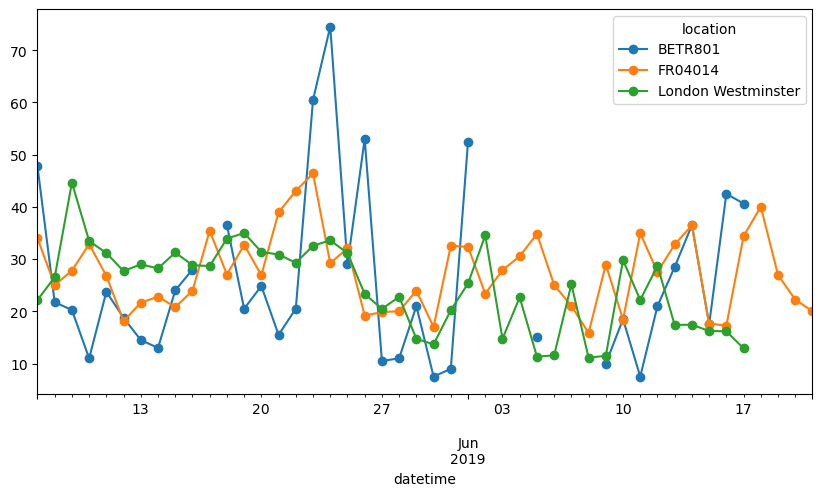

In [22]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

Более подробная информация о силе временных рядов resampling приведена в разделе [инструкции пользователя на передискретизацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-resampling).

Полный обзор временных рядов приведен на страницах, посвященных [временным рядам и функциям дат](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries).

<a href="https://t.me/init_python"><img src="https://dfedorov.spb.ru/pandas/logo-telegram.png" width="35" height="35" alt="telegram" align="left"></a>